In [1]:
# import the basic daata sciece lib
import numpy as np
import pandas as pd

# import the datasets
dataframe= pd.read_csv("age_height.csv")
dataframe.head()

,Age(year),Height(ft)
0,0.0,0.50
1,1.0,0.75
2,2.0,1.00
3,3.0,NaN
4,3.0,2.00


In [2]:
# handling the missing data
dataframe.isnull().sum()

Age(year)     0
Height(ft)    3
dtype: int64

In [3]:
# we have 3 NaN data records just 
# i can use replace mean by NaN
age_mean = dataframe['Age(year)'].mean()
Hei_mean = dataframe['Height(ft)'].mean()
print age_mean
print Hei_mean

10.62
4.10681818182


In [4]:
dataframe['Age(year)'] = dataframe['Age(year)'].replace(np.NaN,age_mean)

In [5]:
dataframe['Height(ft)'] = dataframe['Height(ft)'].replace(np.NaN,Hei_mean)

In [6]:
dataframe.isnull().sum()

Age(year)     0
Height(ft)    0
dtype: int64

In [7]:
# predict the height Based age 
# age  ---> X , Independed Feature
# Height --> y , depended Feature
X = dataframe.iloc[:,0:1].values
y = dataframe.iloc[:,1:2].values
print X
print "*****"
print y

[[ 0. ]
 [ 1. ]
 [ 2. ]
 [ 3. ]
 [ 3. ]
 [ 4. ]
 [ 5. ]
 [ 5.5]
 [ 6. ]
 [ 7. ]
 [ 8. ]
 [10. ]
 [11. ]
 [13. ]
 [12. ]
 [13. ]
 [14. ]
 [15. ]
 [16. ]
 [17. ]
 [18. ]
 [19. ]
 [20. ]
 [21. ]
 [22. ]]
*****
[[0.5       ]
 [0.75      ]
 [1.        ]
 [4.10681818]
 [2.        ]
 [2.5       ]
 [3.        ]
 [4.10681818]
 [3.5       ]
 [3.75      ]
 [4.        ]
 [4.2       ]
 [4.5       ]
 [4.10681818]
 [4.75      ]
 [5.        ]
 [5.1       ]
 [5.3       ]
 [5.5       ]
 [5.6       ]
 [5.7       ]
 [5.8       ]
 [5.9       ]
 [6.        ]
 [6.        ]]


In [8]:
print X.ndim
print y.ndim
print "****"
print X.shape
print y.shape


2
2
****
(25L, 1L)
(25L, 1L)


In [19]:
# regression 
# train_test_split  ---> sklearn.model_selection
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state= 0)

In [20]:
print X_train
print y_train

[[20. ]
 [15. ]
 [22. ]
 [21. ]
 [12. ]
 [ 1. ]
 [ 8. ]
 [13. ]
 [ 6. ]
 [ 5. ]
 [16. ]
 [ 3. ]
 [ 7. ]
 [ 5.5]
 [18. ]
 [ 3. ]
 [ 0. ]
 [19. ]
 [13. ]
 [11. ]]
[[5.9       ]
 [5.3       ]
 [6.        ]
 [6.        ]
 [4.75      ]
 [0.75      ]
 [4.        ]
 [4.10681818]
 [3.5       ]
 [3.        ]
 [5.5       ]
 [2.        ]
 [3.75      ]
 [4.10681818]
 [5.7       ]
 [4.10681818]
 [0.5       ]
 [5.8       ]
 [5.        ]
 [4.5       ]]


In [14]:
# linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [21]:
print X_train.shape
print y_train.shape
#lr.fit()


(20L, 1L)
(20L, 1L)


In [23]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
# Y = B0 + B1 * X
B0 = lr.intercept_
B1 = lr.coef_

In [27]:
print "Y = ", B0 , " + ",B1," *   X"

Y =  [1.9061999]  +  [[0.2111966]]  *   X


In [29]:
# find the hei when person having 11 year
lr.predict([[11]])

array([[4.22936247]])

In [31]:
y_pre = lr.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error as mse
error = mse(y_test,y_pre)
print error

0.38562251182156015


In [34]:
print "Y = ", B0 , " + ",B1," *   X" , " (+/-) ",error

Y =  [1.9061999]  +  [[0.2111966]]  *   X  (+/-)  0.38562251182156015


In [36]:
from sklearn.metrics import r2_score as r2_score
print r2_score(y_test,y_pre)

0.867465455106695


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline 

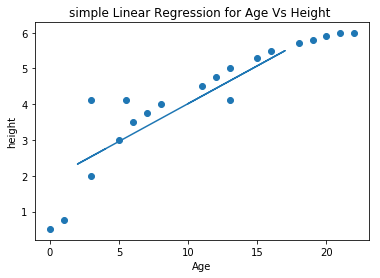

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_test , y_pre)
#plt.plot(X_test,y_test)
plt.xlabel("Age")
plt.ylabel("height")
plt.title("simple Linear Regression for Age Vs Height ")
plt.show()

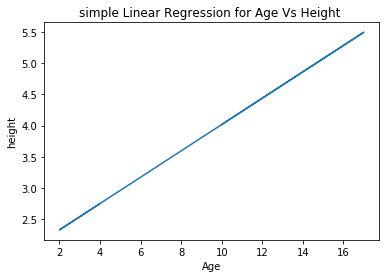

In [42]:
#plt.scatter(X_train,y_train)
plt.plot(X_test , y_pre)
#plt.plot(X_test,y_test)
plt.xlabel("Age")
plt.ylabel("height")
plt.title("simple Linear Regression for Age Vs Height ")
plt.show()

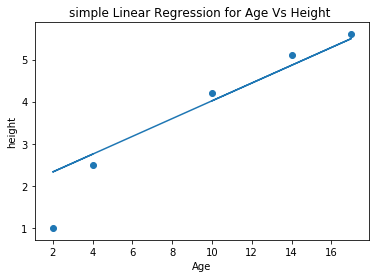

In [43]:
#plt.scatter(X_train,y_train)
plt.plot(X_test , y_pre)
plt.scatter(X_test,y_test)
plt.xlabel("Age")
plt.ylabel("height")
plt.title("simple Linear Regression for Age Vs Height ")
plt.show()

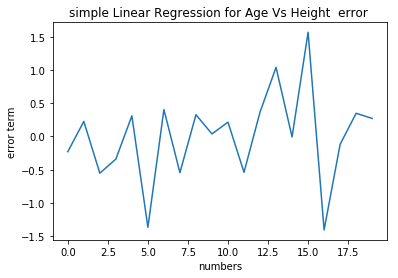

In [50]:
# error term

len1 = np.arange(len(X_train)) # ID 
len1 = len1[:,np.newaxis]
plt.plot(len1 ,  y_train - lr.predict(X_train))

plt.xlabel("numbers")
plt.ylabel("error term")
plt.title("simple Linear Regression for Age Vs Height  error ")
plt.show()